In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Dataset.csv')


In [4]:
df.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
df.describe(include='object')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [9]:
# check the missing value in each column
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# filling the missing values with mode
df['Cuisines']=df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [8]:
# Task 1 Top Cusinins 
# calculate the cusines numbers 
cusinie_count=df['Cuisines'].value_counts()
cusinie_count

Cuisines
North Indian                          945
North Indian, Chinese                 511
Fast Food                             354
Chinese                               354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, B�_rek                        1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1825, dtype: int64

In [9]:
# showing the top three cusinie
top_three=cusinie_count.head(3)
top_three

Cuisines
North Indian             945
North Indian, Chinese    511
Fast Food                354
Name: count, dtype: int64

In [11]:
# count tottal number of resturants
rest_numbers=len(df['Restaurant ID'])
rest_numbers

9551

In [12]:
# calculating the percentage of each cuisines
percentage=(top_three.values/rest_numbers)*100
percentage
data={'North Indian':percentage[0],'North Indian, Chinese':percentage[1],'Fast Food':percentage[2]}
data


{'North Indian': np.float64(9.894251910794681),
 'North Indian, Chinese': np.float64(5.350225107318606),
 'Fast Food': np.float64(3.706418176107214)}

In [13]:
# showing the percentage of each cuisines in dataframe
Cusi_per=pd.DataFrame(data.items(),columns = ['cuisine','percentage'])
Cusi_per

,cuisine,percentage
0,North Indian,9.894252
1,"North Indian, Chinese",5.350225
2,Fast Food,3.706418


In [36]:
# Task 2 City Analysis
#the city with highest number of resturants 
df['City'].value_counts().head(1)

City
New Delhi    5473
Name: count, dtype: int64

In [37]:
# Average rating 
df['Aggregate rating'].mean()

np.float64(2.66637001361114)

In [55]:
# Showing the city and the Avarage rating 
average_ratings = df.groupby(['City','Restaurant Name'])['Aggregate rating'].mean().reset_index()
average_ratings

,City,Restaurant Name,Aggregate rating
0,Abu Dhabi,Applebee's,4.0
1,Abu Dhabi,Bait El Khetyar,4.0
2,Abu Dhabi,Cho Gao - Crowne Plaza Abu Dhabi,4.4
3,Abu Dhabi,Denny's,4.6
4,Abu Dhabi,Famous Dave's Barbecue,4.6
...,...,...,...
7969,��stanbul,Leman K�_lt�_r,3.7
7970,��stanbul,Naml۱ Gurme,4.1
7971,��stanbul,Starbucks,4.9
7972,��stanbul,Valonia,4.2


In [56]:
# Sorting by the Avarage rating 
average_ratings= df.groupby('City')['Aggregate rating'].mean().reset_index()
average_ratings_city=average_ratings.sort_values(by='Aggregate rating',ascending=False)
average_ratings_city

,City,Aggregate rating
56,Inner City,4.900000
107,Quezon City,4.800000
73,Makati City,4.650000
95,Pasig City,4.633333
75,Mandaluyong City,4.625000
...,...,...
88,New Delhi,2.438845
83,Montville,2.400000
78,Mc Millan,2.400000
89,Noida,2.036204


In [59]:
# the City with the Top Average Rating
average_ratings_city.iloc[0,0]

'Inner City'

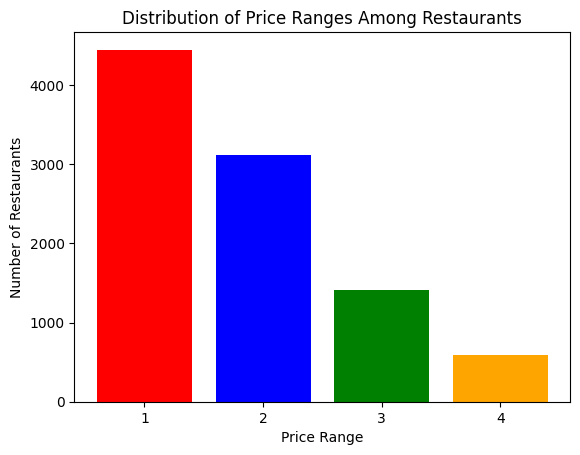

In [74]:
# Task 3 Price Range Distribution
price_range=df['Price range'].value_counts()
price_counts = df['Price range'].value_counts()
plt.bar(['1','2','3','4'], list(price_counts.values), color=['red', 'blue', 'green','orange'])
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.show()

In [83]:
# the Price Range frequancy 
price_range=df['Price range'].value_counts().values
price_range

array([4444, 3113, 1408,  586])

In [90]:
#price Range Percentage
count_pr=len(df['Price range'])
percentage=round(df['Price range'].value_counts()/count_pr*100,2)
percentage

Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64

In [99]:
# Shoing the Price range resturants and the percentage
data = {
    'Price Range res_count': df['Price range'].value_counts().values,
    'Percentage': percentage
}

# Creating the DataFrame
df_result = pd.DataFrame(data)
df_result

,Price Range res_count,Percentage
Price range,,
1,4444,46.53
2,3113,32.59
3,1408,14.74
4,586,6.14


In [102]:
# Task 4 Online Deleviry
df['Has Online delivery'].value_counts()


Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [103]:
# Caluclating the resturants number
total_onl_delivery=len(df['Has Online delivery'])
total_onl_delivery

9551

In [104]:
# Caluclating the percentage of resturants wich have deleviry or not
online_delivery_percentage=(df['Has Online delivery'].value_counts().values/total_onl_delivery*100)
online_delivery_percentage

array([74.33776568, 25.66223432])

In [106]:
#showing the number of resturants and the percentage
data = {
    'Online delivery': df['Has Online delivery'].value_counts(),
    'Percentage': online_delivery_percentage
}

# Creating the DataFrame
online_delivery_percentage_df = pd.DataFrame(data)
online_delivery_percentage_df

,Online delivery,Percentage
Has Online delivery,,
No,7100,74.337766
Yes,2451,25.662234


In [111]:
# the average rating based on the dilevry statues 
df_new=df.groupby('Has Online delivery')['Aggregate rating'].mean().round(2)
df_new

Has Online delivery
No     2.47
Yes    3.25
Name: Aggregate rating, dtype: float64